# Modeling Using 35 Family Classifications

In [1]:
# Imports & Setup:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import PIL
import PIL.Image
from PIL import Image
import tensorflow as tf
import tensorflow_datasets as tfds
from sklearn.model_selection import train_test_split

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import utils
from tensorflow.keras import layers

tf.random.set_seed(42)

### Read in Data

In [2]:
# function to load in and process images
def load_image(path):
    images = Image.open(f'./../CUB_200_2011/images/{path}') 
    new_image=images.resize((128,128))
    color_image=new_image.convert("RGB")
    arrays1 = np.asarray(color_image)
    floaters= arrays1.astype('float32')
    floaters2=floaters/255.0
    return floaters2

In [11]:
class_map_dir= pd.read_csv('Tables/class_map_dir_output_new_classes_f.csv')
class_map_dir.head(5)

,F1,Image Id,Image Name,Is Training Image,Class Id,Class Name,Species Gen,Order,Order_Num_Seq,Species,Species_Num_Seq,Family,Family_Num_Seq
0,0,1,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11
1,1,2,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11
2,2,3,001.Black_footed_Albatross/Black_Footed_Albatr...,0,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11
3,3,4,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11
4,4,5,001.Black_footed_Albatross/Black_Footed_Albatr...,1,1,001.Black_footed_Albatross,Albatrosses,PROCELLARIIFORMES,11,Albatrosses,1,Diomedeidae,11


## Build Neural Networks


#### With train/test split denoted in intial dataset

In [15]:
class_map_dir_train=class_map_dir.loc[class_map_dir['Is Training Image']==1]
list_of_images_train=[load_image(i) for i in class_map_dir_train['Image Name']]
array_of_img_train=np.asarray(list_of_images_train)
list_of_labels_train=class_map_dir_train['Family_Num_Seq']

In [16]:
class_map_dir_test=class_map_dir.loc[class_map_dir['Is Training Image']==0]
list_of_images_test=[load_image(i) for i in class_map_dir_test['Image Name']]
array_of_img_test=np.asarray(list_of_images_test)
list_of_labels_test=class_map_dir_test['Family_Num_Seq']

In [17]:
# sanity check length of train datasets
print(len(list_of_images_train))
print(len(list_of_labels_train))

# sanity check length of test datasets
print(len(list_of_images_test))
print(len(list_of_labels_test))

5994
5994
5794
5794


In [20]:
X_train_alt=array_of_img_train
y_train_alt=list_of_labels_train

X_test_alt=array_of_img_test
y_test_alt=list_of_labels_test

X_train_alt = X_train_alt.reshape(X_train_alt.shape[0], 128, 128, 3)
X_test_alt = X_test_alt.reshape(X_test_alt.shape[0], 128, 128, 3)
y_train_alt = utils.to_categorical(y_train_alt,36)
y_test_alt = utils.to_categorical(y_test_alt,36)


In [24]:
model_alt = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt.add(Flatten(input_shape = (128, 128, 3)))
model_alt.add(Dense(512, activation = 'relu'))
model_alt.add(Dense(512, activation = 'relu'))
model_alt.add(Dense(256, activation = 'relu'))

model_alt.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_alt  = model_alt.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 10s 399ms/step - loss: 15.6682 - accuracy: 0.0726 - val_loss: 5.1275 - val_accuracy: 0.0255
Epoch 2/50
24/24 [==============================] - 9s 382ms/step - loss: 3.6828 - accuracy: 0.1420 - val_loss: 3.1126 - val_accuracy: 0.1648
Epoch 3/50
24/24 [==============================] - 9s 397ms/step - loss: 3.0811 - accuracy: 0.1802 - val_loss: 3.0440 - val_accuracy: 0.1962
Epoch 4/50
24/24 [==============================] - 11s 460ms/step - loss: 3.0287 - accuracy: 0.2032 - val_loss: 3.0191 - val_accuracy: 0.1983
Epoch 5/50
24/24 [==============================] - 11s 460ms/step - loss: 2.9912 - accuracy: 0.2042 - val_loss: 3.0136 - val_accuracy: 0.2252
Epoch 6/50
24/24 [==============================] - 10s 432ms/step - loss: 2.9415 - accuracy: 0.2191 - val_loss: 2.9214 - val_accuracy: 0.2209
Epoch 7/50
24/24 [==============================] - 11s 458ms/step - loss: 2.9245 - accuracy: 0.2216 - val_loss: 2.9145 - val_accuracy: 0.2183


In [41]:
model_alt.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_2 (RandomFlip)  (None, 128, 128, 3)       0         
                                                                 
 random_rotation_2 (RandomRo  (None, 128, 128, 3)      0         
 tation)                                                         
                                                                 
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_4 (Dense)             (None, 512)               25166336  
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                      

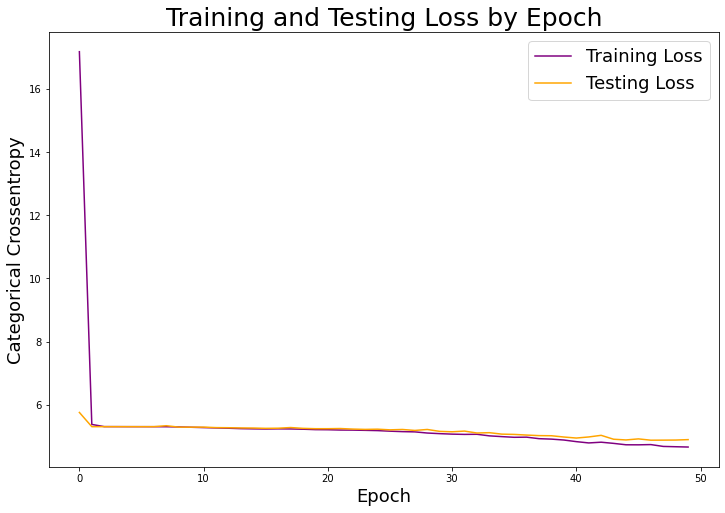

In [38]:
# Check out our train loss and test loss over epochs.
train_loss = history_alt.history['loss']
test_loss = history_alt.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='purple')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [25]:
model_alt2 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt2.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt2.add(Flatten(input_shape = (128, 128, 3)))
model_alt2.add(Dense(512, activation = 'relu'))
model_alt2.add(Dense(512, activation = 'relu'))
model_alt2.add(Dense(256, activation = 'relu'))

model_alt2.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_alt2  = model_alt2.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 85s 3s/step - loss: 10.1273 - accuracy: 0.1018 - val_loss: 3.7350 - val_accuracy: 0.1493
Epoch 2/50
24/24 [==============================] - 81s 3s/step - loss: 3.2378 - accuracy: 0.1610 - val_loss: 3.0643 - val_accuracy: 0.1905
Epoch 3/50
24/24 [==============================] - 81s 3s/step - loss: 3.0289 - accuracy: 0.1947 - val_loss: 2.9875 - val_accuracy: 0.2097
Epoch 4/50
24/24 [==============================] - 80s 3s/step - loss: 2.9621 - accuracy: 0.2164 - val_loss: 2.9267 - val_accuracy: 0.2276
Epoch 5/50
24/24 [==============================] - 67s 3s/step - loss: 2.9069 - accuracy: 0.2339 - val_loss: 2.8865 - val_accuracy: 0.2346
Epoch 6/50
24/24 [==============================] - 45s 2s/step - loss: 2.8597 - accuracy: 0.2349 - val_loss: 2.8543 - val_accuracy: 0.2273
Epoch 7/50
24/24 [==============================] - 45s 2s/step - loss: 2.8176 - accuracy: 0.2434 - val_loss: 2.7983 - val_accuracy: 0.2561
Epoch 8/50
24/24 [=

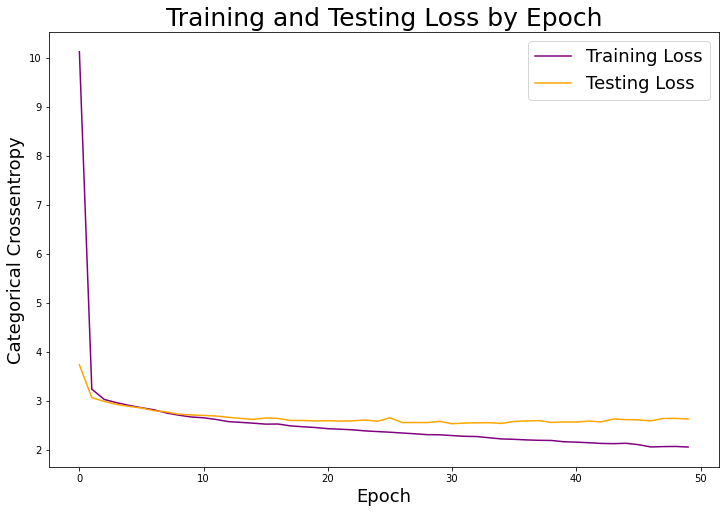

In [28]:
# Check out our train loss and test loss over epochs.
train_loss = history_alt2.history['loss']
test_loss = history_alt2.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='purple')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [32]:
# Evaluate model on test data.
score = model_alt2.evaluate(X_test_alt,
                       y_test_alt,
                       verbose=1)

labels = model_alt2.metrics_names

# Show model performance.
print(f'{labels[0]}: {score[0]}')
print(f'{labels[1]}: {score[1]}')

182/182 [==============================] - 15s 82ms/step - loss: 2.6296 - accuracy: 0.2979
loss: 2.629591703414917
accuracy: 0.29789435863494873


In [26]:
model_alt3 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt3.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt3.add(MaxPooling2D(pool_size = (2, 2))) # ADDED MAX POOLING

model_alt3.add(Flatten(input_shape = (128, 128, 3)))
model_alt3.add(Dense(512, activation = 'relu'))
model_alt3.add(Dense(512, activation = 'relu'))
model_alt3.add(Dense(256, activation = 'relu'))

model_alt3.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_alt3  = model_alt3.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 57s 2s/step - loss: 3.1568 - accuracy: 0.1685 - val_loss: 3.0035 - val_accuracy: 0.2106
Epoch 2/50
24/24 [==============================] - 54s 2s/step - loss: 2.9427 - accuracy: 0.2069 - val_loss: 2.9000 - val_accuracy: 0.2252
Epoch 3/50
24/24 [==============================] - 50s 2s/step - loss: 2.8403 - accuracy: 0.2272 - val_loss: 2.7948 - val_accuracy: 0.2390
Epoch 4/50
24/24 [==============================] - 53s 2s/step - loss: 2.7629 - accuracy: 0.2397 - val_loss: 2.7465 - val_accuracy: 0.2544
Epoch 5/50
24/24 [==============================] - 52s 2s/step - loss: 2.6940 - accuracy: 0.2571 - val_loss: 2.7152 - val_accuracy: 0.2632
Epoch 6/50
24/24 [==============================] - 50s 2s/step - loss: 2.6585 - accuracy: 0.2646 - val_loss: 2.6710 - val_accuracy: 0.2572
Epoch 7/50
24/24 [==============================] - 53s 2s/step - loss: 2.6061 - accuracy: 0.2763 - val_loss: 2.6312 - val_accuracy: 0.2692
Epoch 8/50
24/24 [==

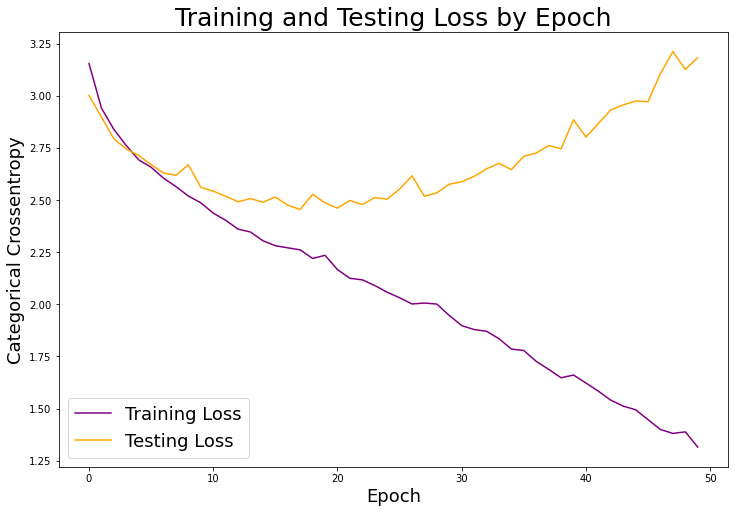

In [27]:
# Check out our train loss and test loss over epochs.
train_loss = history_alt3.history['loss']
test_loss = history_alt3.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='purple')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [22]:
model_alt4 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt4.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt4.add(MaxPooling2D(pool_size = (2, 2))) # ADDED MAX POOLING
model_alt4.add(Conv2D(16,                        # ADDED ADDITIONAL LAYER
                     kernel_size = (3, 3),
                     activation = 'relu'))
model_alt4.add(MaxPooling2D(pool_size=(2, 2)))
model_alt4.add(Flatten(input_shape = (128, 128, 3)))
model_alt4.add(Dense(512, activation = 'relu'))
model_alt4.add(Dense(512, activation = 'relu'))
model_alt4.add(Dense(256, activation = 'relu'))

model_alt4.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_alt4  = model_alt4.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 42s 2s/step - loss: 3.5394 - accuracy: 0.1178 - val_loss: 3.1646 - val_accuracy: 0.1250
Epoch 2/50
24/24 [==============================] - 48s 2s/step - loss: 3.1437 - accuracy: 0.1560 - val_loss: 3.0795 - val_accuracy: 0.1764
Epoch 3/50
24/24 [==============================] - 47s 2s/step - loss: 3.0200 - accuracy: 0.1939 - val_loss: 2.9482 - val_accuracy: 0.2159
Epoch 4/50
24/24 [==============================] - 44s 2s/step - loss: 2.9199 - accuracy: 0.2172 - val_loss: 2.8910 - val_accuracy: 0.2278
Epoch 5/50
24/24 [==============================] - 42s 2s/step - loss: 2.8434 - accuracy: 0.2277 - val_loss: 2.8188 - val_accuracy: 0.2378
Epoch 6/50
24/24 [==============================] - 42s 2s/step - loss: 2.7751 - accuracy: 0.2397 - val_loss: 2.7578 - val_accuracy: 0.2406
Epoch 7/50
24/24 [==============================] - 42s 2s/step - loss: 2.7156 - accuracy: 0.2466 - val_loss: 2.7687 - val_accuracy: 0.2444
Epoch 8/50
24/24 [==

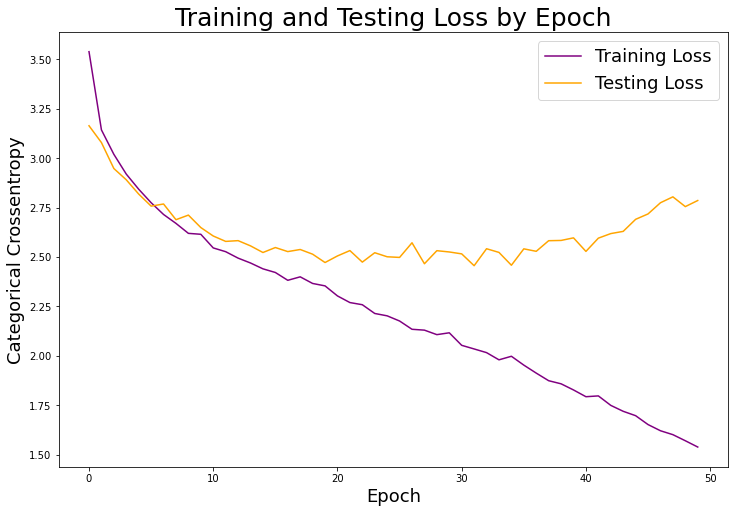

In [23]:
# Check out our train loss and test loss over epochs.
train_loss = history_alt4.history['loss']
test_loss = history_alt4.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='purple')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [30]:
#Models 3,4 were bad, so use model 2 as baseline 
model_alt5 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt5.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt5.add(Flatten(input_shape = (128, 128, 3)))    

model_alt5.add(Dense(512, activation = 'relu'))
model_alt5.add(Dense(512, activation = 'relu'))
model_alt5.add(Dense(256, activation = 'relu'))

model_alt5.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
history_alt5  = model_alt5.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50


ValueError: in user code:

    File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\jmsqu\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 227, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" '

    ValueError: Exception encountered when calling layer "sequential_7" (type Sequential).
    
    Input 0 of layer "conv2d_7" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 512)
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 128, 128, 3), dtype=float32)
      • training=True
      • mask=None


In [34]:
#Model 4 used as baseline 

model_alt6 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt6.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt6.add(MaxPooling2D(pool_size = (3, 3))) # CHANGED MAX POOLING FROM 2 to 3
model_alt6.add(Conv2D(16,                        
                     kernel_size = (3, 3),
                     activation = 'relu'))
model_alt6.add(MaxPooling2D(pool_size=(2, 2)))
model_alt6.add(Flatten(input_shape = (128, 128, 3)))
model_alt6.add(Dense(512, activation = 'relu'))
model_alt6.add(Dropout(0.5))  #ADDED DROPOUT
model_alt6.add(Dense(512, activation = 'relu'))
model_alt6.add(Dropout(0.5))  #ADDED DROPOUT
model_alt6.add(Dense(256, activation = 'relu'))

model_alt6.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt6.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_alt6  = model_alt6.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=30,
                    verbose=1)

Epoch 1/30
24/24 [==============================] - 22s 886ms/step - loss: 3.2559 - accuracy: 0.1363 - val_loss: 3.1383 - val_accuracy: 0.1536
Epoch 2/30
24/24 [==============================] - 23s 981ms/step - loss: 3.0998 - accuracy: 0.1648 - val_loss: 3.0451 - val_accuracy: 0.2035
Epoch 3/30
24/24 [==============================] - 24s 1s/step - loss: 3.0416 - accuracy: 0.1847 - val_loss: 3.0108 - val_accuracy: 0.2081
Epoch 4/30
24/24 [==============================] - 25s 1s/step - loss: 2.9832 - accuracy: 0.2035 - val_loss: 2.9349 - val_accuracy: 0.2128
Epoch 5/30
24/24 [==============================] - 30s 1s/step - loss: 2.9397 - accuracy: 0.2191 - val_loss: 2.9024 - val_accuracy: 0.2259
Epoch 6/30
24/24 [==============================] - 55s 2s/step - loss: 2.9027 - accuracy: 0.2212 - val_loss: 2.8442 - val_accuracy: 0.2384
Epoch 7/30
24/24 [==============================] - 60s 3s/step - loss: 2.8408 - accuracy: 0.2379 - val_loss: 2.8000 - val_accuracy: 0.2444
Epoch 8/30
24/

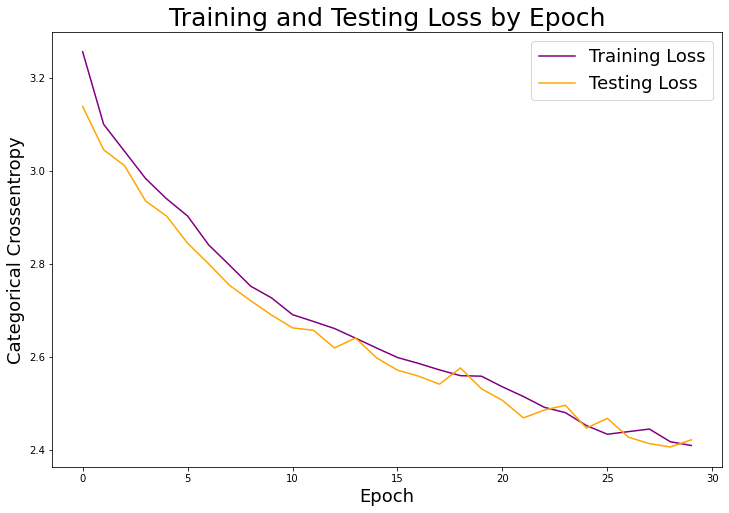

In [35]:
# Check out our train loss and test loss over epochs.
train_loss = history_alt6.history['loss']
test_loss = history_alt6.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='purple')
plt.plot(test_loss, label='Testing Loss', color='orange')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)

plt.legend(fontsize = 18);

In [36]:
#Model 6 used as baseline 

model_alt7 = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])
model_alt7.add(Conv2D(filters = 6, # number of filters
                     kernel_size = (3, 3), # height/width of filter
                     activation = 'relu', # activation function
                     input_shape = (128, 128, 3)# shape of input (image)
                     ))  
model_alt7.add(MaxPooling2D(pool_size = (3, 3))) # CHANGED MAX POOLING FROM 2 to 3
model_alt7.add(Conv2D(16,                        
                     kernel_size = (3, 3),
                     activation = 'relu'))
model_alt7.add(MaxPooling2D(pool_size=(3, 3)))
model_alt7.add(Flatten(input_shape = (128, 128, 3)))
model_alt7.add(Dense(512, activation = 'relu'))
model_alt7.add(Dropout(0.5))  #ADDED DROPOUT
model_alt7.add(Dense(512, activation = 'relu'))
model_alt7.add(Dropout(0.5))  #ADDED DROPOUT
model_alt7.add(Dense(256, activation = 'relu'))
model_alt7.add(Dropout(0.2))  #ADDED DROPOUT
model_alt7.add(Dense(128, activation = 'relu'))
model_alt7.add(Dropout(0.2))  #ADDED DROPOUT
model_alt7.add(Dense(128, activation = 'relu'))

model_alt7.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt7.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history_alt7  = model_alt6.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 22s 919ms/step - loss: 2.3819 - accuracy: 0.3207 - val_loss: 2.4017 - val_accuracy: 0.3281
Epoch 2/50
24/24 [==============================] - 25s 1s/step - loss: 2.3852 - accuracy: 0.3205 - val_loss: 2.4035 - val_accuracy: 0.3229
Epoch 3/50
24/24 [==============================] - 25s 1s/step - loss: 2.3727 - accuracy: 0.3223 - val_loss: 2.3762 - val_accuracy: 0.3307
Epoch 4/50
24/24 [==============================] - 26s 1s/step - loss: 2.3572 - accuracy: 0.3287 - val_loss: 2.3771 - val_accuracy: 0.3329
Epoch 5/50
24/24 [==============================] - 27s 1s/step - loss: 2.3449 - accuracy: 0.3312 - val_loss: 2.4669 - val_accuracy: 0.3120
Epoch 6/50
24/24 [==============================] - 29s 1s/step - loss: 2.3595 - accuracy: 0.3258 - val_loss: 2.3478 - val_accuracy: 0.3397
Epoch 7/50
24/24 [==============================] - 31s 1s/step - loss: 2.3374 - accuracy: 0.3337 - val_loss: 2.4122 - val_accuracy: 0.3167
Epoch 8/50
24/24 

In [40]:
IMG_SIZE = (128, 128, 3)

In [45]:
# Create the base model from the pre-trained model MobileNet V2
IMG_SHAPE = IMG_SIZE 
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
base_model.trainable = False
#base_model.summary()

In [44]:
# Add in new model for transfer learning
model_alt8 = Sequential([ base_model,
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

model_alt8.add(Flatten(input_shape = (128, 128, 3)))
model_alt8.add(Dense(512, activation = 'relu'))
model_alt8.add(Dropout(0.5))  #ADDED DROPOUT
model_alt8.add(Dense(512, activation = 'relu'))
model_alt8.add(Dropout(0.5))  #ADDED DROPOUT
model_alt8.add(Dense(256, activation = 'relu'))
model_alt8.add(Dropout(0.2))  #ADDED DROPOUT
model_alt8.add(Dense(128, activation = 'relu'))
model_alt8.add(Dropout(0.2))  #ADDED DROPOUT
model_alt8.add(Dense(128, activation = 'relu'))

model_alt8.add(Dense(36, activation = 'softmax'))
# Compile model.
model_alt8.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model_alt8.trainable = True
history_alt8  = model_alt8.fit(X_train_alt,
                    y_train_alt, 
                    batch_size=256,
                    validation_data=(X_test_alt, y_test_alt),
                    epochs=50,
                    verbose=1)

Epoch 1/50
24/24 [==============================] - 135s 5s/step - loss: 3.2618 - accuracy: 0.1678 - val_loss: 2.7514 - val_accuracy: 0.3108
Epoch 2/50
24/24 [==============================] - 133s 6s/step - loss: 2.7019 - accuracy: 0.2733 - val_loss: 2.3927 - val_accuracy: 0.3535
Epoch 3/50
24/24 [==============================] - 129s 5s/step - loss: 2.4582 - accuracy: 0.3150 - val_loss: 2.1951 - val_accuracy: 0.3885
Epoch 4/50
24/24 [==============================] - 130s 6s/step - loss: 2.2881 - accuracy: 0.3477 - val_loss: 2.0640 - val_accuracy: 0.4096
Epoch 5/50
24/24 [==============================] - 130s 6s/step - loss: 2.1612 - accuracy: 0.3749 - val_loss: 1.9562 - val_accuracy: 0.4329
Epoch 6/50
24/24 [==============================] - 130s 6s/step - loss: 2.0488 - accuracy: 0.4002 - val_loss: 1.8617 - val_accuracy: 0.4748
Epoch 7/50
24/24 [==============================] - 131s 6s/step - loss: 1.9620 - accuracy: 0.4231 - val_loss: 1.7491 - val_accuracy: 0.4990
Epoch 8/50
24